<h1> PATTERN MINING </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fim import apriori

In [2]:
df = pd.read_csv('df_train.csv', skipinitialspace = True)

In [3]:
df.head()

,rating,startYear,runtimeMinutes,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,8,1995,58,0,1,0,21,1,1,0,0,0,1,0,781,['US'],"Action,Adventure,Animation"
1,6,1982,58,0,1,0,1,0,2,0,0,0,1,0,11,['XWG'],Action
2,6,1992,58,0,1,0,24,0,3,0,0,0,1,1,38,['RU'],Comedy
3,6,2021,58,0,22,0,56,0,4,0,1,0,1,0,15,['MX'],Reality-TV
4,8,2020,80,1,347,2,47,4,4,1,1,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


In [4]:
import re

def convert_integer_to_range(rating):
    # Calcola il limite inferiore e superiore in base al numero
    lower_limit = rating - 1
    upper_limit = rating
    # Restituisce la stringa nel formato (lower_limit, upper_limit] con uno spazio dopo la virgola
    return f"({lower_limit}, {upper_limit}]"

# Applicare la funzione alla colonna 'rating'
df['rating'] = df['rating'].apply(convert_integer_to_range)


In [5]:
#RICONVERTO TITLETYPE

# Lista dei valori unici in 'titleType'
unique_title_types = ['tvEpisode', 'videoGame', 'movie', 'tvSeries', 'video', 'tvMiniSeries', 'short', 'tvMovie', 'tvSpecial', 'tvShort']

# Crea un dizionario di mappatura che assegna un numero a ciascun tipo
title_type_mapping = {title: i + 1 for i, title in enumerate(unique_title_types)}

# Crea una mappatura inversa che assegna il numero alla stringa
reverse_title_type_mapping = {v: k for k, v in title_type_mapping.items()}

# Ora riconverti i numeri nel DataFrame df1 in stringhe
df['titleType'] = df['titleType'].map(reverse_title_type_mapping)

# Verifica il risultato
print(df['titleType'].head())

0    tvEpisode
1    videoGame
2        movie
3     tvSeries
4     tvSeries
Name: titleType, dtype: object


In [6]:
df.head()

,rating,startYear,runtimeMinutes,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,"(7, 8]",1995,58,0,1,0,21,1,tvEpisode,0,0,0,1,0,781,['US'],"Action,Adventure,Animation"
1,"(5, 6]",1982,58,0,1,0,1,0,videoGame,0,0,0,1,0,11,['XWG'],Action
2,"(5, 6]",1992,58,0,1,0,24,0,movie,0,0,0,1,1,38,['RU'],Comedy
3,"(5, 6]",2021,58,0,22,0,56,0,tvSeries,0,1,0,1,0,15,['MX'],Reality-TV
4,"(7, 8]",2020,80,1,347,2,47,4,tvSeries,1,1,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


<h2>Pre-processing</h2>

In [7]:
#rating
#Funzione per mappare gli intervalli di rating a stringhe descrittive in inglese
def map_rating_to_string(rating):
    if rating == "(0, 1]":
        return "Very Low"
    elif rating == "(1, 2]":
        return "Low"
    elif rating == "(2, 3]":
        return "Slightly Low"
    elif rating == "(3, 4]":
        return "Medium-Low"
    elif rating == "(4, 5]":
        return "Medium"
    elif rating == "(5, 6]":
        return "Medium-High"
    elif rating == "(6, 7]":
        return "High"
    elif rating == "(7, 8]":
        return "Very High"
    elif rating == "(8, 9]":
        return "Excellent"
    elif rating == "(9, 10]":
        return "Outstanding"
    else:
        return "Unknown"

# Applicare la funzione alla colonna 'rating' per ottenere le stringhe descrittive
df['rating'] = df['rating'].apply(map_rating_to_string)

df.head()


,rating,startYear,runtimeMinutes,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Very High,1995,58,0,1,0,21,1,tvEpisode,0,0,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Medium-High,1982,58,0,1,0,1,0,videoGame,0,0,0,1,0,11,['XWG'],Action
2,Medium-High,1992,58,0,1,0,24,0,movie,0,0,0,1,1,38,['RU'],Comedy
3,Medium-High,2021,58,0,22,0,56,0,tvSeries,0,1,0,1,0,15,['MX'],Reality-TV
4,Very High,2020,80,1,347,2,47,4,tvSeries,1,1,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


In [8]:
# Columns
cols_to_bin = ["startYear", "runtimeMinutes", "totalImages", "awardWins",
               "totalVideos", "totalCredits","criticReviewsTotal",
               "awardNominationsExcludeWins","numRegions","userReviewsTotal","ratingCount"]

# Number of bins
n_bins = 5 
labels = ["very low", "low", "medium", "high", "very high"]

for col in cols_to_bin:
    df[col] = pd.cut(df[col], bins=n_bins, labels=labels)
    df[col] = df[col].astype(str) + f"_{col}"

In [9]:
df['canHaveEpisodes'] = df['canHaveEpisodes'].replace({0: 'No episodes', 1: 'Has episodes'})

In [10]:
df['isAdult'] = df['isAdult'].replace({0: 'No Adult', 1: 'Is Adult'})

In [11]:
df.head()

,rating,startYear,runtimeMinutes,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Very High,very high_startYear,very low_runtimeMinutes,very low_awardWins,very low_totalImages,very low_totalVideos,very low_totalCredits,very low_criticReviewsTotal,tvEpisode,very low_awardNominationsExcludeWins,No episodes,No Adult,very low_numRegions,very low_userReviewsTotal,very low_ratingCount,['US'],"Action,Adventure,Animation"
1,Medium-High,high_startYear,very low_runtimeMinutes,very low_awardWins,very low_totalImages,very low_totalVideos,very low_totalCredits,very low_criticReviewsTotal,videoGame,very low_awardNominationsExcludeWins,No episodes,No Adult,very low_numRegions,very low_userReviewsTotal,very low_ratingCount,['XWG'],Action
2,Medium-High,high_startYear,very low_runtimeMinutes,very low_awardWins,very low_totalImages,very low_totalVideos,very low_totalCredits,very low_criticReviewsTotal,movie,very low_awardNominationsExcludeWins,No episodes,No Adult,very low_numRegions,very low_userReviewsTotal,very low_ratingCount,['RU'],Comedy
3,Medium-High,very high_startYear,very low_runtimeMinutes,very low_awardWins,very low_totalImages,very low_totalVideos,very low_totalCredits,very low_criticReviewsTotal,tvSeries,very low_awardNominationsExcludeWins,Has episodes,No Adult,very low_numRegions,very low_userReviewsTotal,very low_ratingCount,['MX'],Reality-TV
4,Very High,very high_startYear,very low_runtimeMinutes,very low_awardWins,very low_totalImages,very low_totalVideos,very low_totalCredits,very low_criticReviewsTotal,tvSeries,very low_awardNominationsExcludeWins,Has episodes,No Adult,medium_numRegions,low_userReviewsTotal,very low_ratingCount,['KR'],"Comedy,Drama,Romance"


<h1>A PRIORI</h1>

In [12]:
X = df.values.tolist()

In [13]:
X[0]

['Very High',
 'very high_startYear',
 'very low_runtimeMinutes',
 'very low_awardWins',
 'very low_totalImages',
 'very low_totalVideos',
 'very low_totalCredits',
 'very low_criticReviewsTotal',
 'tvEpisode',
 'very low_awardNominationsExcludeWins',
 'No episodes',
 'No Adult',
 'very low_numRegions',
 'very low_userReviewsTotal',
 'very low_ratingCount',
 "['US']",
 'Action,Adventure,Animation']

In [14]:
# Definiamo la griglia dei parametri da esplorare
supp_values = np.linspace(10, 50, 5)  # supporto tra 0.1 e 0.5 in 5 passi
zmin_values = np.arange(2, df.shape[1] + 1)  # zmin va da 2 a max numero di colonne in X

# Lista per memorizzare i risultati
results_list = []

# Loop sui parametri
for supp in supp_values:
    for zmin in zmin_values:
        # Eseguiamo Apriori per trovare gli itemset frequenti
        frequent_itemsets = apriori(X, supp=supp, zmin=zmin)

        # Calcoliamo il numero di itemset frequenti trovati
        num_frequent = len(frequent_itemsets)

        # Aggiungiamo i risultati alla lista
        results_list.append({"supp": supp, "zmin": zmin, "num_frequent_itemsets": num_frequent})

# Convertiamo la lista in un DataFrame
results = pd.DataFrame(results_list)

# Ordinare i risultati per il numero di itemset frequenti
results = results.sort_values(by=["num_frequent_itemsets"], ascending=False)

# Stampiamo i migliori parametri
best_parameters = results.iloc[0]
print(f"Best parameters: supp={best_parameters['supp']}, zmin={best_parameters['zmin']}")


Best parameters: supp=10.0, zmin=2.0


<h2>Frequent/Closed/Maximal</h2>

In [15]:
# supp = 2  # 2%
supp = 10  # 20%
zmin = 4  # minimum number of items per item set

itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(medium_startYear, No Adult, very low_awardNom...",10.501949
1,"(medium_startYear, No episodes, No Adult, very...",10.057261
2,"(medium_startYear, No episodes, No Adult, very...",10.057261
3,"(medium_startYear, No episodes, No Adult, very...",10.057261
4,"(medium_startYear, No episodes, No Adult, very...",10.057261
...,...,...
89937,"(very low_awardNominationsExcludeWins, very lo...",99.323830
89938,"(very low_awardNominationsExcludeWins, very lo...",99.415205
89939,"(very low_awardNominationsExcludeWins, very lo...",99.427388
89940,"(very low_awardNominationsExcludeWins, very lo...",99.439571


In [16]:
# Impostare una larghezza massima per le colonne
pd.set_option('display.max_colwidth', None)

# Stampa il DataFrame direttamente per visualizzarlo come tabella
pd.DataFrame(itemsets, columns=["Frequent", "support"]).tail(3)

,Frequent,support
89939,"(very low_awardNominationsExcludeWins, very low_totalCredits, very low_ratingCount, very low_totalImages)",99.427388
89940,"(very low_awardNominationsExcludeWins, very low_totalVideos, very low_ratingCount, very low_totalImages)",99.439571
89941,"(very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",99.451754


In [17]:
# supp = 2  # 2%
supp = 10  # 20%
zmin = 4  # minimum number of items per item set

itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"(medium_startYear, No episodes, No Adult, very low_awardWins, very low_userReviewsTotal, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",10.038986
1,"(medium_startYear, No episodes, No Adult, very low_awardWins, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",10.045078
2,"(medium_startYear, No episodes, No Adult, very low_awardWins, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_totalImages)",10.051170
3,"(medium_startYear, No episodes, No Adult, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_totalImages)",10.057261
4,"(medium_startYear, very low_runtimeMinutes, No Adult, very low_criticReviewsTotal, very low_awardWins, very low_userReviewsTotal, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount)",10.118177
...,...,...
14531,"(very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",99.323830
14532,"(very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_totalImages)",99.415205
14533,"(very low_awardNominationsExcludeWins, very low_totalCredits, very low_ratingCount, very low_totalImages)",99.427388
14534,"(very low_awardNominationsExcludeWins, very low_totalVideos, very low_ratingCount, very low_totalImages)",99.439571


In [18]:
# Impostare una larghezza massima per le colonne
pd.set_option('display.max_colwidth', None)

# Stampa il DataFrame direttamente per visualizzarlo come tabella
pd.DataFrame(itemsets, columns=["Closed", "Support"]).tail(3)

,Closed,Support
14533,"(very low_awardNominationsExcludeWins, very low_totalCredits, very low_ratingCount, very low_totalImages)",99.427388
14534,"(very low_awardNominationsExcludeWins, very low_totalVideos, very low_ratingCount, very low_totalImages)",99.439571
14535,"(very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",99.451754


In [19]:
itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

,maximal_itemset,support
0,"(medium_startYear, No episodes, No Adult, very low_awardWins, very low_userReviewsTotal, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",10.038986
1,"(medium_startYear, very low_runtimeMinutes, No Adult, very low_criticReviewsTotal, very low_awardWins, very low_userReviewsTotal, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",10.112086
2,"(Drama, very low_numRegions, very low_runtimeMinutes, No Adult, very low_criticReviewsTotal, very low_awardWins, very low_userReviewsTotal, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",10.240010
3,"(Excellent, No episodes, very low_numRegions, very low_runtimeMinutes, No Adult, very low_criticReviewsTotal, very low_awardWins, very low_userReviewsTotal, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",10.307018
4,"(short, No episodes, very low_numRegions, very low_runtimeMinutes, No Adult, very low_criticReviewsTotal, very low_awardWins, very low_userReviewsTotal, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",14.839181
5,"(Medium-High, No episodes, very low_numRegions, very low_runtimeMinutes, No Adult, very low_criticReviewsTotal, very low_awardWins, very low_userReviewsTotal, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",13.730507
6,"(High, movie, No episodes, very low_runtimeMinutes, very low_awardWins, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",10.014620
7,"(High, movie, No episodes, very low_runtimeMinutes, very low_userReviewsTotal, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",10.020712
8,"(High, movie, No episodes, No Adult, very low_criticReviewsTotal, very low_awardWins, very low_userReviewsTotal, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",10.453216
9,"(High, ['US'], very low_runtimeMinutes, very low_criticReviewsTotal, very low_awardWins, very low_userReviewsTotal, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",10.075536


In [20]:
# Impostare una larghezza massima per le colonne
pd.set_option('display.max_colwidth', None)

# Stampa il DataFrame direttamente per visualizzarlo come tabella
pd.DataFrame(itemsets, columns=["Maximal", "Support"]).tail(3)



,Maximal,Support
21,"(high_startYear, ['US'], very low_runtimeMinutes, No Adult, very low_criticReviewsTotal, very low_awardWins, very low_userReviewsTotal, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",10.191277
22,"(movie, very high_startYear, No episodes, very low_numRegions, very low_runtimeMinutes, No Adult, very low_criticReviewsTotal, very low_awardWins, very low_userReviewsTotal, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",11.878655
23,"(['US'], very high_startYear, No episodes, very low_numRegions, very low_runtimeMinutes, No Adult, very low_criticReviewsTotal, very low_awardWins, very low_userReviewsTotal, very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",17.915448


<h2>Support Plot</h2>

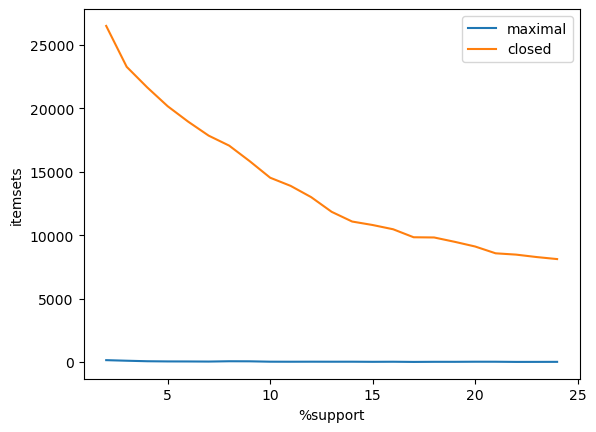

In [21]:
len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

<h2>RULES</h2>

In [22]:
# Define the range of confidence values to test
conf_values = range(50, 100, 5)

# Initialize a dictionary to store the results
results = {}

# Loop over the confidence values
for conf in conf_values:
    # Run the apriori algorithm
    rules = apriori(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")

    # Convert the rules to a DataFrame
    rules_df = pd.DataFrame(
        rules,
        columns=[
            "consequent",
            "antecedent",
            "abs_support",
            "%_support",
            "confidence",
            "lift",
        ],
    )

    # Sort the rules by lift
    rules_df = rules_df.sort_values(by="lift", axis=0, ascending=False)

    # Store the rules DataFrame in the results dictionary
    results[conf] = rules_df

# Now, 'results' is a dictionary where the keys are confidence values and the values are the corresponding rules DataFrames
avg_lifts = {}

# Loop over the results
for conf, rules_df in results.items():
    # Calculate the average lift for this confidence level
    avg_lift = rules_df['lift'].mean()

    # Store the average lift in the dictionary
    avg_lifts[conf] = avg_lift

# Find the confidence level with the highest average lift
best_conf = max(avg_lifts, key=avg_lifts.get)

print(f"The best value for conf is {best_conf} with an average lift of {avg_lifts[best_conf]}")


The best value for conf is 50 with an average lift of 1.0479816735214007


In [23]:
conf = 50
rules = apriori(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
180048,tvEpisode,"(Very High, ['US'], No episodes, very low_numRegions, very low_runtimeMinutes, No Adult, very low_criticReviewsTotal, very low_awardWins, very low_totalVideos, very low_totalImages)",1250,7.614522,0.683807,2.389396
180278,tvEpisode,"(Very High, ['US'], No episodes, very low_numRegions, very low_runtimeMinutes, No Adult, very low_awardWins, very low_awardNominationsExcludeWins, very low_ratingCount)",1250,7.614522,0.683807,2.389396
180296,tvEpisode,"(Very High, ['US'], No episodes, very low_numRegions, very low_runtimeMinutes, No Adult, very low_awardWins, very low_totalCredits, very low_totalImages)",1250,7.614522,0.683807,2.389396
179984,tvEpisode,"(Very High, ['US'], No episodes, very low_numRegions, very low_runtimeMinutes, No Adult, very low_criticReviewsTotal, very low_awardWins, very low_userReviewsTotal, very low_totalVideos, very low_totalImages)",1250,7.614522,0.683807,2.389396
179982,tvEpisode,"(Very High, ['US'], No episodes, very low_numRegions, very low_runtimeMinutes, No Adult, very low_criticReviewsTotal, very low_awardWins, very low_userReviewsTotal, very low_totalVideos, very low_ratingCount)",1250,7.614522,0.683807,2.389396
...,...,...,...,...,...,...
118340,very low_numRegions,"(High, movie, No Adult, very low_totalCredits, very low_totalImages)",1507,9.180068,0.853341,0.895280
118349,very low_numRegions,"(High, movie, No Adult)",1507,9.180068,0.851894,0.893762
118348,very low_numRegions,"(High, movie, No Adult, very low_totalImages)",1507,9.180068,0.851894,0.893762
113757,very low_numRegions,"(High, movie, No episodes, No Adult, very low_totalImages)",1507,9.180068,0.851894,0.893762


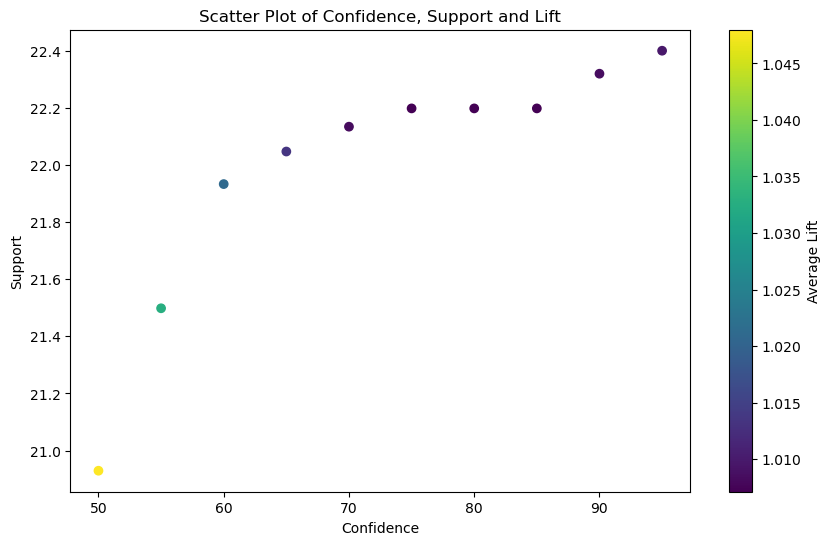

In [24]:
# Extract confidence, support and lift values from the results
conf_values = [conf for conf in results.keys()]
avg_lift_values = [avg_lift for avg_lift in avg_lifts.values()]
supp_values = [results[conf]['%_support'].mean() for conf in results.keys()]

# Create a new figure
plt.figure(figsize=(10, 6))

# Create a scatter plot
scatter = plt.scatter(conf_values, supp_values, c=avg_lift_values, cmap='viridis')

# Add a colorbar
plt.colorbar(scatter, label='Average Lift')

# Set the labels for the x and y axes
plt.xlabel('Confidence')
plt.ylabel('Support')

# Set the title of the plot
plt.title('Scatter Plot of Confidence, Support and Lift')

# Display the plot
plt.show()

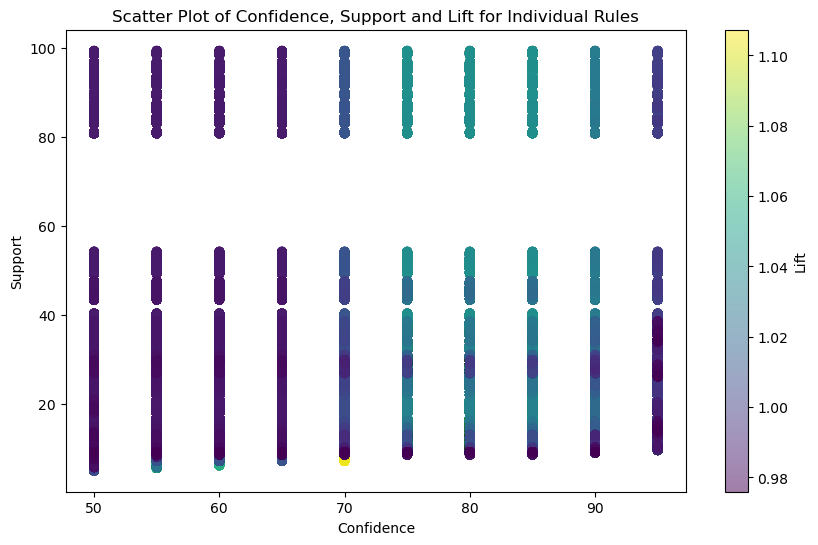

In [25]:
# Create a new figure
plt.figure(figsize=(10, 6))

# Loop over the results
for conf, rules_df in results.items():
    # Create a scatter plot for each set of rules
    plt.scatter([conf]*len(rules_df), rules_df['%_support'], c=rules_df['lift'], cmap='viridis', alpha=0.5)

# Add a colorbar
plt.colorbar(label='Lift')

# Set the labels for the x and y axes
plt.xlabel('Confidence')
plt.ylabel('Support')

# Set the title of the plot
plt.title('Scatter Plot of Confidence, Support and Lift for Individual Rules')

# Display the plot
plt.show()
     

In [26]:
#rules_df[rules_df["consequent"] == "0_criticReviews"]

In [27]:
len_r = []
min_sup = 10
max_sup = 50
min_conf = 50
max_conf = 90
for i in range(min_sup, max_sup):  # support
    len_r_wrt_i = []
    for j in range(min_conf, max_conf):  # confidence
        rules = apriori(X, target="r", supp=i, zmin=zmin, conf=j, report="aScl")
        len_r_wrt_i.append(len(rules))  # study your characteristics/properties here

    len_r.append(len_r_wrt_i)
len_r = np.array(len_r)

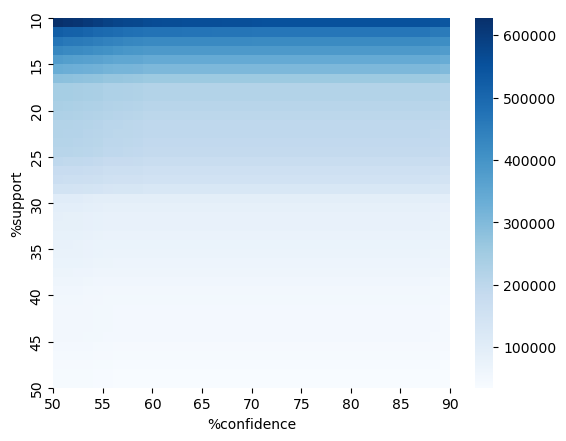

In [28]:
sns.heatmap(len_r, cmap="Blues", fmt='g')
plt.yticks(np.arange(0, max_sup-min_sup +1, 5), np.arange(min_sup, max_sup+1,5 ))
plt.xticks(np.arange(0, max_conf-min_conf+1, 5), np.arange(min_conf, max_conf+1, 5))
plt.xlabel("%confidence")
plt.ylabel("%support")
plt.show()

<h1> FP-GROWTH</h1>

In [29]:
from fim import fpgrowth

In [30]:
%%time
#7sec

# Define the parameter grid
supp_values = np.linspace(10, 50, 5)
zmin_values = np.arange(2, df.shape[1])

# Initialize a DataFrame to store the results
results = pd.DataFrame(columns=["supp", "zmin", "num_frequent_itemsets",
                                "num_closed_itemsets", "num_maximal_itemsets"])

# Loop over the parameter grid
for supp in supp_values:
    for zmin in zmin_values:
        # Run FPGROWTH for each type of itemset
        frequent_itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
        closed_itemsets = fpgrowth(X, target="c", supp=supp, zmin=zmin, report="S")
        maximal_itemsets = fpgrowth(X, target="m", supp=supp, zmin=zmin, report="S")

        # Compute some evaluation metric (in this case, the number of itemsets)
        num_frequent = len(frequent_itemsets)
        num_closed = len(closed_itemsets)
        num_maximal = len(maximal_itemsets)

        # Store the results
        results = pd.concat([results, pd.DataFrame([{"supp": supp, "zmin": zmin, "num_frequent_itemsets": num_frequent,
                                                     "num_closed_itemsets": num_closed, "num_maximal_itemsets": num_maximal}])],
                            ignore_index=True)

# Sort the results based on some criteria
results = results.sort_values(by=["num_frequent_itemsets", "num_closed_itemsets", "num_maximal_itemsets"], ascending=False)

# Print the best parameters
best_parameters = results.iloc[0]
print(f"Best parameters: supp={best_parameters['supp']}, zmin={best_parameters['zmin']}")


<timed exec>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Best parameters: supp=10.0, zmin=2
CPU times: user 2.86 s, sys: 232 ms, total: 3.1 s
Wall time: 2.75 s


In [31]:
supp = 10  # 20%
zmin = 4  # minimum number of items per item set

itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",99.451754
1,"(very low_awardNominationsExcludeWins, very low_totalVideos, very low_ratingCount, very low_totalImages)",99.439571
2,"(very low_awardNominationsExcludeWins, very low_totalCredits, very low_ratingCount, very low_totalImages)",99.427388
3,"(very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_totalImages)",99.415205
4,"(very low_awardNominationsExcludeWins, very low_totalCredits, very low_totalVideos, very low_ratingCount, very low_totalImages)",99.323830
...,...,...
89937,"(medium_startYear, No episodes, very low_totalVideos, very low_totalCredits, very low_totalImages)",10.057261
89938,"(medium_startYear, No episodes, very low_totalVideos, very low_totalCredits)",10.057261
89939,"(medium_startYear, No episodes, very low_totalVideos, very low_totalImages)",10.057261
89940,"(medium_startYear, No episodes, very low_totalCredits, very low_totalImages)",10.057261


In [32]:
# Define the range of confidence values to test
conf_values = range(50, 100, 5)

# Initialize a dictionary to store the results
results = {}

# Loop over the confidence values
for conf in conf_values:
    # Run the apriori algorithm
    rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")

    # Convert the rules to a DataFrame
    rules_df = pd.DataFrame(
        rules,
        columns=[
            "consequent",
            "antecedent",
            "abs_support",
            "%_support",
            "confidence",
            "lift",
        ],
    )

    # Sort the rules by lift
    rules_df = rules_df.sort_values(by="lift", axis=0, ascending=False)

    # Store the rules DataFrame in the results dictionary
    results[conf] = rules_df

# Now, 'results' is a dictionary where the keys are confidence values and the values are the corresponding rules DataFrames
avg_lifts = {}

# Loop over the results
for conf, rules_df in results.items():
    # Calculate the average lift for this confidence level
    avg_lift = rules_df['lift'].mean()

    # Store the average lift in the dictionary
    avg_lifts[conf] = avg_lift

# Find the confidence level with the highest average lift
best_conf = max(avg_lifts, key=avg_lifts.get)

print(f"The best value for conf is {best_conf} with an average lift of {avg_lifts[best_conf]}")


The best value for conf is 50 with an average lift of 1.0479816735214007


In [33]:
conf = 50
rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)

,consequent,antecedent,abs_support,%_support,confidence,lift
0,very low_totalImages,"(very low_totalCredits, very low_totalVideos, very low_ratingCount)",16326,99.451754,0.999143,1.000545
1,very low_ratingCount,"(very low_totalCredits, very low_totalVideos, very low_totalImages)",16326,99.451754,0.998899,1.000422
2,very low_totalVideos,"(very low_totalCredits, very low_ratingCount, very low_totalImages)",16326,99.451754,0.998715,1.000300
3,very low_totalCredits,"(very low_totalVideos, very low_ratingCount, very low_totalImages)",16326,99.451754,0.998654,1.000788
4,very low_totalImages,"(very low_awardNominationsExcludeWins, very low_totalVideos, very low_ratingCount)",16324,99.439571,0.998899,1.000300
...,...,...,...,...,...,...
627215,movie,"(medium_startYear, No episodes, No Adult, very low_awardWins, very low_userReviewsTotal, very low_awardNominationsExcludeWins, very low_totalCredits)",950,5.787037,0.576456,1.711540
627216,movie,"(medium_startYear, No episodes, No Adult, very low_awardWins, very low_userReviewsTotal, very low_awardNominationsExcludeWins)",950,5.787037,0.576456,1.711540
627217,movie,"(medium_startYear, No episodes, No Adult, very low_awardWins, very low_userReviewsTotal)",950,5.787037,0.576456,1.711540
627218,movie,"(medium_startYear, No episodes, No Adult, very low_awardWins)",952,5.799220,0.576970,1.713065


In [34]:
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)

rules_df['consequent'].unique()

array(['very low_totalImages', 'very low_ratingCount',
       'very low_totalVideos', 'very low_totalCredits',
       'very low_awardNominationsExcludeWins',
       'very low_userReviewsTotal', 'very low_awardWins',
       'very low_criticReviewsTotal', 'No Adult',
       'very low_runtimeMinutes', 'very low_numRegions', 'No episodes',
       'very high_startYear', "['US']", 'tvEpisode', 'Very High', 'movie'],
      dtype=object)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16416 entries, 0 to 16415
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rating                       16416 non-null  object
 1   startYear                    16416 non-null  object
 2   runtimeMinutes               16416 non-null  object
 3   awardWins                    16416 non-null  object
 4   totalImages                  16416 non-null  object
 5   totalVideos                  16416 non-null  object
 6   totalCredits                 16416 non-null  object
 7   criticReviewsTotal           16416 non-null  object
 8   titleType                    16416 non-null  object
 9   awardNominationsExcludeWins  16416 non-null  object
 10  canHaveEpisodes              16416 non-null  object
 11  isAdult                      16416 non-null  object
 12  numRegions                   16416 non-null  object
 13  userReviewsTotal             16

In [36]:
for title in df['titleType'].unique():
  print(f"Title Type: {title} -> {len(rules_df[rules_df['consequent'] == title])} rules")

Title Type: tvEpisode -> 12732 rules
Title Type: videoGame -> 0 rules
Title Type: movie -> 5742 rules
Title Type: tvSeries -> 0 rules
Title Type: video -> 0 rules
Title Type: tvMiniSeries -> 0 rules
Title Type: short -> 0 rules
Title Type: tvMovie -> 0 rules
Title Type: tvSpecial -> 0 rules
Title Type: tvShort -> 0 rules


In [37]:
for rat in df['rating'].unique():
  print(f"Rating: {rat} -> {len(rules_df[rules_df['consequent'] == rat])} rules")

Rating: Very High -> 4095 rules
Rating: Medium-High -> 0 rules
Rating: Excellent -> 0 rules
Rating: High -> 0 rules
Rating: Slightly Low -> 0 rules
Rating: Medium -> 0 rules
Rating: Outstanding -> 0 rules
Rating: Medium-Low -> 0 rules
Rating: Very Low -> 0 rules
Rating: Low -> 0 rules
